## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [1]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

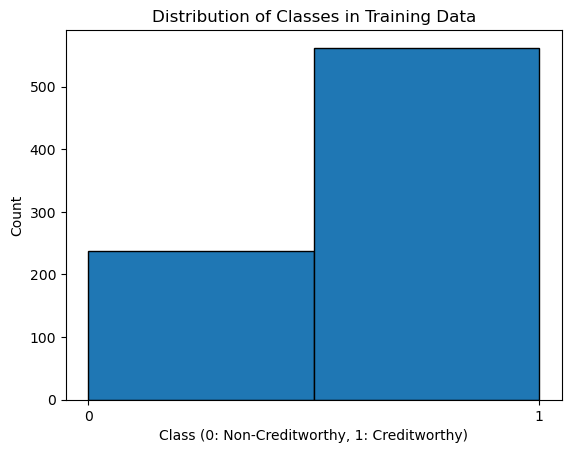

In [3]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [147]:
# Обучение Random Forest
rf_model = RandomForestClassifier(
    n_estimators=125, 
    criterion='gini', 
    max_depth=7, 
    max_features=0.1, 
    min_samples_leaf=8, 
    min_samples_split=20, 
    random_state=42)
rf_model.fit(X_train, y_train)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)
rf_pred_auc = rf_model.predict_proba(X_test)[:, 1]

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred_auc)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.7f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.04,
    max_depth=3,
    max_features=0.75,
    min_samples_leaf=28,
    min_samples_split=29,
    subsample = 0.8,
    random_state=42
    )
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)
gb_pred_log_proba = gb_model.predict_proba(X_test)[:,1]

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred_log_proba)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.7f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.7937120
Accuracy: 0.72
Precision: 0.72
Recall: 0.98

Gradient Boosting метрики:
ROC AUC: 0.7844787
Accuracy: 0.75
Precision: 0.78
Recall: 0.90


In [148]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(
    activation='logistic',
    hidden_layer_sizes=(50,),
    max_iter=600,
    n_iter_no_change=45,
    alpha=0.018,
    learning_rate_init=0.0008,
    solver='adam',
    random_state=42)
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)
mlp_pred_proba = mlp_model.predict_proba(X_test)[:,1]

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred_proba)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.7f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.8027115
Accuracy: 0.74
Precision: 0.75
Recall: 0.94


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели

## Random Forest

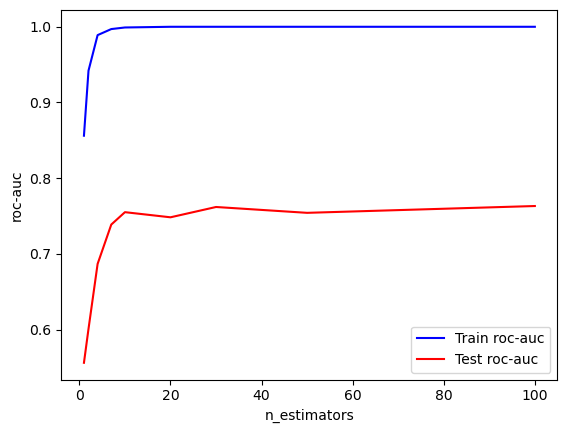

In [6]:
values = [1, 2, 4, 7, 10, 20, 30, 50, 100]
#values = [x for x in range(50, 1001, 50)]
#values = [x for x in range(400, 601, 20)]
train_scores, test_scores = [], []
for n in values:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)

    pred_proba_train = rf.predict_proba(X_train)[:, 1]
    pred_proba_test = rf.predict_proba(X_test)[:, 1]
    roc_auc_train = roc_auc_score(y_train, pred_proba_train)
    roc_auc_test = roc_auc_score(y_test, pred_proba_test)
    train_scores.append(roc_auc_train)
    test_scores.append(roc_auc_test)

plt.plot(values, train_scores, color='blue', label='Train roc-auc')
plt.plot(values, test_scores, color='red', label='Test roc-auc')
plt.xlabel('n_estimators')
plt.ylabel('roc-auc')
plt.legend()
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV

In [41]:
rf_model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [75, 100, 125],
              'criterion': ['gini'], # gini, entropy
              'max_depth': [6, 7, 8],
              'min_samples_split': [20, 25],
              'min_samples_leaf': [5, 8, 10],
              'max_features': [0.1, 0.15, 0.2],
             }
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)
print("model is fitted")

model is fitted


In [42]:
rf_pred_proba = grid_search.predict_proba(X_test)[:, 1]

print(f"params: {grid_search.best_params_}")
print(f"roc auc on train: {roc_auc_score(y_train, grid_search.predict_proba(X_train)[:, 1])}")
print(f"roc auc on cv: {grid_search.best_score_}")
print(f"roc auc on test: {roc_auc_score(y_test, rf_pred_proba)}") 
# cv - 0.778, test - 0.7958, params: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}

params: {'criterion': 'gini', 'max_depth': 7, 'max_features': 0.1, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 125}
roc auc on train: 0.9024641885223841
roc auc on cv: 0.7907225975849764
roc auc on test: 0.7937120149602619


## Gradient Boosting

In [120]:
gb_model = GradientBoostingClassifier(random_state=42)
param_grid = {'learning_rate': [0.04],
              'n_estimators': [100],
              'max_depth': [3, 4],
              'min_samples_leaf': [x for x in range(25, 30)],
              'min_samples_split': [x for x in range(29, 34)],
              'subsample': [0.8],
              'max_features': [0.75]
             }
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("model is fitted")

model is fitted


In [121]:
gb_pred_proba = grid_search.predict_proba(X_test)[:, 1]

print(f"params: {grid_search.best_params_}")
print(f"roc auc on train: {roc_auc_score(y_train, grid_search.predict_proba(X_train)[:, 1])}")
print(f"roc auc on cv: {grid_search.best_score_}")
print(f"roc auc on test: {roc_auc_score(y_test, gb_pred_proba)}")

params: {'learning_rate': 0.04, 'max_depth': 3, 'max_features': 0.75, 'min_samples_leaf': 28, 'min_samples_split': 29, 'n_estimators': 100, 'subsample': 0.8}
roc auc on train: 0.8852612219264929
roc auc on cv: 0.785245196682985
roc auc on test: 0.7844787283777467


## MLP

In [144]:
mlp_model = MLPClassifier(random_state=42)
param_grid = {'hidden_layer_sizes': [(50,)],
              'learning_rate_init': [0.0008, 0.001, 0.0012],
              'activation': ['logistic'],
              'solver': ['adam'],
              'alpha': [0.018, 0.02],
              'max_iter': [600],
              'n_iter_no_change': [45]
             }
grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("model is fitted")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

model is fitted


In [145]:
mlp_pred_proba = grid_search.predict_proba(X_test)[:, 1]

print(f"params: {grid_search.best_params_}")
print(f"roc auc on train: {roc_auc_score(y_train, grid_search.predict_proba(X_train)[:, 1])}")
print(f"roc auc on cv: {grid_search.best_score_}")
print(f"roc auc on test: {roc_auc_score(y_test, mlp_pred_proba)}")
# train - 0.81, cv - 0.77, test - 0.80, 
#params: {'activation': 'logistic', 'alpha': 0.018, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.0008, 'max_iter': 600, 'n_iter_no_change': 45, 'solver': 'adam'}

params: {'activation': 'logistic', 'alpha': 0.018, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.0008, 'max_iter': 600, 'n_iter_no_change': 45, 'solver': 'adam'}
roc auc on train: 0.8110888483507281
roc auc on cv: 0.7689809825855592
roc auc on test: 0.8027115474520804
